In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [89]:
image_folder = "/Users/ethanweber/Documents/cARd/server/images"
image_filename = os.path.join(image_folder, "card_5.png")
image = cv2.cvtColor(cv2.imread(image_filename), cv2.COLOR_BGR2RGB)

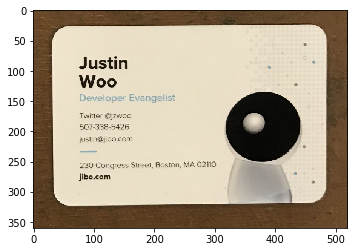

In [90]:
plt.imshow(image)

In [91]:
edges = cv2.Canny(image,100,200,apertureSize=3)

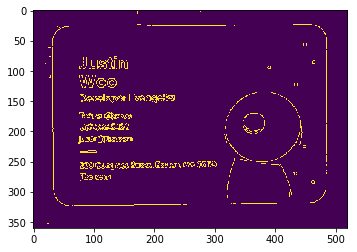

In [92]:
plt.imshow(edges)

In [93]:
lines = cv2.HoughLines(edges,1,np.pi/180,100)

In [94]:
# draw the lines
line_image = image.copy()
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(line_image)

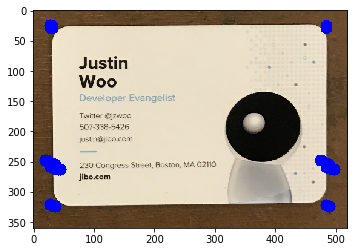

In [114]:
# find intersections in x,y space
intersection_image = image.copy()
# iterate over all possible intersections
for i in range(len(lines)):
    for j in range(i, len(lines)):
        line1 = lines[i]
        line2 = lines[j]
        rho1, theta1 = line1[0]
        rho2, theta2 = line2[0]
        
        theta_diff = abs(theta1 - theta2) % 3.14
        theta_thresh = .1
        if abs(theta_diff - 1.5707) < theta_thresh:
            x = int(rho1*np.cos(theta1) + rho2*np.cos(theta2))
            y = int(rho1*np.sin(theta1) + rho2*np.sin(theta2))
            cv2.circle(intersection_image, (x,y), 10, (0,0,255), -1)
plt.imshow(intersection_image)

In [113]:
# do non-maximal suppression on intersections

In [99]:
theta

1.6057029